# FIR FILTER DI MERDA



![Fir Filter](https://surf-vhdl.com/wp/wp-content/uploads/2015/11/fir_filter4_architecture.jpg)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from bitstring import Bits

In [7]:
class fir_filter:     
    def __init__(self, coeff):
        self.c = np.array(coeff)
        self.x = np.zeros(len(coeff))
    def status(self):
        print('Coeff: ',self.c)
        print('x stored: ',self.x)
    def run(self,x):
        self.x=np.append(x,self.x)[:-1]
        return np.sum(self.x*self.c)
    def reset(self):
        self.x = np.zeros(len(self.c))


def cut_output(n):
    b = Bits(int=n, length=19)
    c = Bits(bin=b.bin[:8])
    return c.bin,c.int


In [8]:
c=[245, 254, 254, 245]

ff=fir_filter(c)
ff.status()

Coeff:  [245 254 254 245]
x stored:  [0. 0. 0. 0.]


## Filter example

In [8]:
#input data

data=-100*np.sin(np.linspace(0,20,30))

ff.reset()
l=[]
for i in data:
    l.append(ff.run(i))

print('Output: ')
for n in l:
    print(n)

print('Real Output: ')
for n in l:
    print(cut_output(int(n)))

Output: 
0.0
-15588.644338295528
-40213.48991362224
-62619.281446178065
-71992.3805472797
-48459.98918422278
-2778.0356053777214
44173.672125600366
70934.960594901
65274.0725548686
29778.424840505908
-19328.019838452426
-59600.22445408097
-72631.00987330574
-52464.40711589282
-8317.946560528882
39630.390098225085
69464.90118884669
67549.15445652872
34758.77847964042
-13918.760070743665
-56234.46389224306
-72847.13356906602
-56163.631612504105
-13809.470755531658
34856.57206459934
67590.75388825066
69431.29265373862
39536.9350181918
-8428.53275891746
Real Output: 
('00000000', 0)
('11111000', -8)
('11101100', -20)
('11100001', -31)
('11011100', -36)
('11101000', -24)
('11111110', -2)
('00010101', 21)
('00100010', 34)
('00011111', 31)
('00001110', 14)
('11110110', -10)
('11100010', -30)
('11011100', -36)
('11100110', -26)
('11111011', -5)
('00010011', 19)
('00100001', 33)
('00100000', 32)
('00010000', 16)
('11111001', -7)
('11100100', -28)
('11011100', -36)
('11100100', -28)
('11111001',

100%|██████████| 100/100 [00:00<00:00, 14125.09it/s]

[  0  14   6  39  29  38  44  69  69  67  63  55  25  13  21 -13 -27 -41
 -54 -65 -75 -83 -88 -90 -69 -87 -60 -51 -62 -49 -15 -22  -8  26  17  49
  37  44  47  69  68  63  35  47  35   1   9 -25 -18 -52 -43 -53 -61 -67
 -90 -69 -87 -60 -52 -63 -51 -16 -23  -9  24  37  48  36  43  47  69  68
  64  57  48  36  24 -10  -3 -38 -30 -63 -52 -82 -87 -90 -90 -87 -82 -74
 -64 -31 -18  -4 -11  23  15  26  56  63]
[  0   1   2   7  10  13  18  21  26  30  32  30  25  19  13   5  -1  -8
 -17 -23 -29 -34 -38 -41 -41 -41 -38 -33 -32 -28 -22 -18 -12  -3   1  10
  15  17  21  23  27  30  28  25  21  14  11   2  -5 -11 -17 -21 -26 -28
 -33 -36 -39 -38 -33 -32 -28 -23 -19 -13  -4   3  12  17  19  21  23  27
  30  31  28  24  20  11   5  -4 -10 -17 -23 -28 -35 -38 -43 -44 -43 -41
 -38 -31 -23 -15  -8  -2   2   6  14  19]


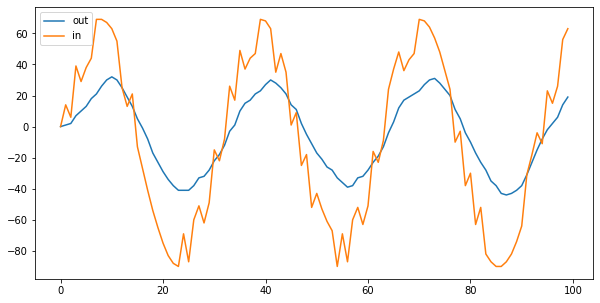

In [11]:
np.random.seed(1234)

x=70*(np.sin(np.linspace(0,20,100))+0.3*(np.random.randint(-1,1,100)))
#x=50+20*(np.sin(np.linspace(0,20,100)))
x=x.astype(int)
print(x)
l=[]
ff.reset()
for i in tqdm(x) :
    ou=cut_output(int(ff.run(i)))
    l.append(ou[1])
l=np.array(l)
print(l)
plt.figure(figsize=(10,5))
plt.plot(l,label='out')
plt.plot(x,label='in')
plt.legend()

In [ ]:
print(l[:4])
print(x[:4])

[12250. 25930. 40381. 55389.]
[50 54 57 61]


## Risposta in frequenza


In [20]:
def signal(f):
    return (100*np.sin(f*np.linspace(0,20,100))).astype(int)

def filter_signal(s):
    c=[245, 254, 254, 245]
    ff=fir_filter(c)
    ff.reset()
    l=[]
    for i in s:
        l.append(ff.run(i))

    for i in range(len(l)):
        l[i]=cut_output(int(l[i]))[1]
    
    return l

<ipython-input-48-9efde38560bf>:6: RuntimeWarning: invalid value encountered in long_scalars
  risposta.append(max(out)/max(s))


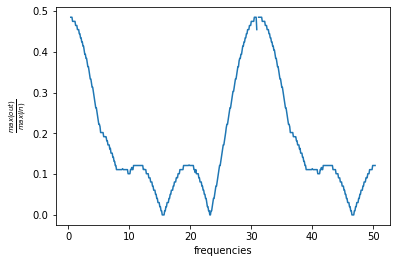

In [48]:
fr_list = [0.4 + 0.1*i for i in range(500)]
risposta = []
for f in (fr_list):
    s = signal(f)
    out = filter_signal(s)
    risposta.append(max(out)/max(s))
    
plt.plot(fr_list,risposta)
plt.xlabel('frequencies')
plt.ylabel(r'$\frac{max(out)}{max(in)}$')
plt.savefig('../img/sim_risposta_in_frequenza.png',dpi=300)